In [1]:
pip install   nltk textblob scikit-learn seaborn


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 3.6 MB/s eta 0:00:03
   ---------- ----------------------------- 2.4/8.7 MB 5.6 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 11.0 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- -------------------------- 1/3 [scikit-learn]
   ------------- 

In [2]:
#The bearer token
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAHJ73AEAAAAApMNgWbmIVthAdZybF9U58qCtJw0%3DNoBTmA3gM6Qyrw2ANibv8BjRF0AMfnZxxKzXqbWXLjiyyNaOcw'

In [11]:
if tweets_en.data:
    for tweet in tweets_en.data:
        print(tweet.text)
else:
    print("No tweets found for this query.")


No tweets found for this query.


In [15]:
import time
import tweepy
from tweepy.errors import TooManyRequests
from langdetect import detect

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAHJ73AEAAAAApMNgWbmIVthAdZybF9U58qCtJw0%3DNoBTmA3gM6Qyrw2ANibv8BjRF0AMfnZxxKzXqbWXLjiyyNaOcw'
client = tweepy.Client(bearer_token=bearer_token)

query = "Betway"

def fetch_tweets(query, max_results=50):
    while True:
        try:
            tweets = client.search_recent_tweets(query=query, max_results=max_results, tweet_fields=['lang'])
            return tweets
        except TooManyRequests:
            print("Rate limit hit! Waiting for 15 minutes before retrying...")
            time.sleep(15 * 60)

tweets = fetch_tweets(query)

if tweets and tweets.data:
    for tweet in tweets.data:
        # tweet.lang gives the Twitter-detected language of the tweet
        if tweet.lang in ['en', 'sw']:  # filter English or Swahili tweets
            print(f"[{tweet.lang}] {tweet.text}")
else:
    print("No tweets found for Betway.")


[en] RT @Ndiks17: Atleast a goal

🎲 209 ODDs
🏹 either or
🥅31 Games

https://t.co/vUdO43Qive : I just placed a bet with Betway. Tap here to copy…
[en] RT @Scarface_ZA: SATURDAY VOUCHER GIVEAWAY 💥🎥🚀

Go to our new WhatsApp group. (Link ➡️ https://t.co/BZkJ5AimmV)  

Take a screenshot of the…
[en] RT @Ndiks17: Atleast a goal

🎲 209 ODDs
🏹 either or
🥅31 Games

https://t.co/vUdO43Qive : I just placed a bet with Betway. Tap here to copy…
[en] I just placed a bet with Betway. Tap here to copy my bet or search for this booking code in the Multi Bet betslip 218D52FD https://t.co/vF6egTtG9E
[en] RT @BtcDank: Thought About it 🤔 💭

Me &amp; @betwaymr200 giving one of the winners R1000 at 13:00 

CHECK PINNED POST FOR DETAILS

#GiveawayAle…
[en] RT @TheChildProTips: 432 odds

Betway code - BW713165D

Good luck https://t.co/2Q1k24kem1
[en] RT @LeswiiSwaMina: Lemme TRY this Market TODAY 
Team To Score in Both Halves
Multi Bet betslip ; BW71A7004 https://t.co/5CDFlt89ux
KICK OFF…
[en] RT @LeswiiSwaMin

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def clean_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove RT and mentions
    text = re.sub(r'RT @\w+: ', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text

tweets_texts = [
    # Your tweet texts here from your fetch
]

for tweet in tweets_texts:
    cleaned = clean_tweet(tweet)
    scores = sia.polarity_scores(cleaned)
    print(f"Tweet: {cleaned}")
    print(f"Sentiment scores: {scores}\n")


In [17]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...


True

In [20]:
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

def clean_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags but keep the text
    text = re.sub(r'#', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

# Example: your list of tweets as strings (replace this with your actual tweets)
tweets = [
    "RT @Ndiks17: Atleast a goal 🎲 209 ODDs 🥅31 Games https://t.co/vUdO43Qive",
    "I just placed a bet with Betway. Tap here to copy my bet or search for this booking code BW71E692B https://t.co/95ijUZ88KA",
    # add more tweets here
]

for tweet in tweets:
    cleaned = clean_tweet(tweet)
    sentiment = sia.polarity_scores(cleaned)
    print(f"Tweet: {cleaned}")
    print(f"Sentiment scores: {sentiment}\n")


Tweet: RT : Atleast a goal 🎲 209 ODDs 🥅31 Games
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Tweet: I just placed a bet with Betway. Tap here to copy my bet or search for this booking code BW71E692B
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



In [21]:
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

sentiment_counts = {'positive': 0, 'neutral': 0, 'negative': 0}

for tweet in tweets:
    cleaned = clean_tweet(tweet)
    scores = sia.polarity_scores(cleaned)
    label = classify_sentiment(scores['compound'])
    sentiment_counts[label] += 1
    print(f"Tweet: {cleaned}")
    print(f"Sentiment: {label}\n")

print("Sentiment summary:", sentiment_counts)


Tweet: RT : Atleast a goal 🎲 209 ODDs 🥅31 Games
Sentiment: neutral

Tweet: I just placed a bet with Betway. Tap here to copy my bet or search for this booking code BW71E692B
Sentiment: neutral

Sentiment summary: {'positive': 0, 'neutral': 2, 'negative': 0}


Sentiment summary: {'positive': 0, 'neutral': 2, 'negative': 0}


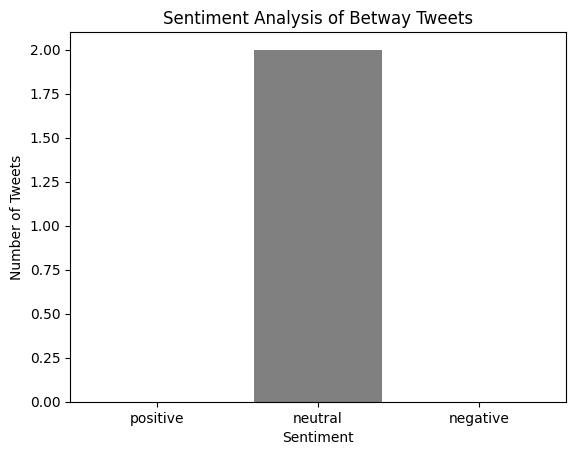

In [22]:
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def clean_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (optional: you can keep hashtags if useful)
    text = re.sub(r'#\w+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Example tweets list (replace with your tweets)
tweets = [
    "RT @Ndiks17: Atleast a goal 🎲 209 ODDs 🥅31 Games https://t.co/vUdO43Qive",
    "I just placed a bet with Betway. Tap here to copy my bet or search for this booking code BW71E692B https://t.co/vF6egTtG9E"
    # add more tweets here
]

# Clean tweets
cleaned_tweets = [clean_tweet(tweet) for tweet in tweets]

# Analyze sentiment
sentiments = [get_sentiment(tweet) for tweet in cleaned_tweets]

# Summarize sentiment counts
summary = {
    'positive': sentiments.count('positive'),
    'neutral': sentiments.count('neutral'),
    'negative': sentiments.count('negative')
}

print('Sentiment summary:', summary)

# Visualization
labels = summary.keys()
counts = summary.values()

plt.bar(labels, counts, color=['green', 'grey', 'red'])
plt.title('Sentiment Analysis of Betway Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
